### HEALTH AND WELLNESS SUBSCRIPTION SERVICE ANALYTICS

Кейс School of Analytics

In [76]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

#### Знакомство с данными

In [77]:
df1 = pd.read_csv("subscription_data.csv")
df2 = pd.read_csv("demographics_data.csv")

In [78]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   client_id   10000 non-null  int64 
 2   start_date  10000 non-null  object
 3   end_date    10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 312.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       10000 non-null  int64 
 1   client_id        10000 non-null  int64 
 2   client_category  10000 non-null  object
 3   renewal_flag     10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


In [79]:
print(df1.isnull().sum())
print(df2.isnull().sum())

Unnamed: 0    0
client_id     0
start_date    0
end_date      0
dtype: int64
Unnamed: 0         0
client_id          0
client_category    0
renewal_flag       0
dtype: int64


In [80]:
print(df1['client_id'].nunique())
print(df2['client_id'].nunique())

10000
10000


In [81]:
df1['start_date'] = pd.to_datetime(df1['start_date'])
df1['end_date'] = pd.to_datetime(df1['end_date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  10000 non-null  int64         
 1   client_id   10000 non-null  int64         
 2   start_date  10000 non-null  datetime64[ns]
 3   end_date    10000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2)
memory usage: 312.6 KB


Проверили данные на пустые значения, проблемы с типами данных, количество уникальных значений. Для простоты работы объединили два датасета в один

In [82]:
df = pd.merge(df1, df2, left_on='client_id', right_on='client_id')
df = df.drop('Unnamed: 0_x', axis=1) #удаление лишних столбцов, дублирующих client_id, которые возникают при объединении датасетов
df = df.drop('Unnamed: 0_y', axis=1)
df

,client_id,start_date,end_date,client_category,renewal_flag
0,1,2023-04-13,2023-08-14,Fitness Enthusiasts,0
1,2,2023-12-15,2024-08-29,Fitness Enthusiasts,1
2,3,2023-09-28,2023-12-29,Busy Professionals,1
3,4,2023-04-17,2023-06-10,Mental Wellness Seekers,1
4,5,2023-03-13,2024-01-04,Fitness Enthusiasts,1
...,...,...,...,...,...
9995,9996,2023-05-28,2023-09-10,Busy Professionals,1
9996,9997,2023-12-31,2024-09-28,Mental Wellness Seekers,1
9997,9998,2023-12-30,2024-12-10,Busy Professionals,1
9998,9999,2023-05-20,2024-03-02,Busy Professionals,1


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   client_id        10000 non-null  int64         
 1   start_date       10000 non-null  datetime64[ns]
 2   end_date         10000 non-null  datetime64[ns]
 3   client_category  10000 non-null  object        
 4   renewal_flag     10000 non-null  int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 390.8+ KB


#### Статистический анализ

In [84]:
df.describe()

,client_id,start_date,end_date,renewal_flag
count,10000.00000,10000,10000,10000.000000
mean,5000.50000,2023-07-01 10:03:47.519999744,2024-01-15 00:24:54.720000,0.704800
min,1.00000,2023-01-01 00:00:00,2023-02-06 00:00:00,0.000000
25%,2500.75000,2023-04-03 00:00:00,2023-10-02 00:00:00,0.000000
50%,5000.50000,2023-06-30 00:00:00,2024-01-14 00:00:00,1.000000
75%,7500.25000,2023-10-01 00:00:00,2024-04-28 00:00:00,1.000000
max,10000.00000,2023-12-31 00:00:00,2024-12-24 00:00:00,1.000000
std,2886.89568,NaN,NaN,0.456155


Период, за который представлены данные в датасете - это подписки, оформленные в течение всего 2023 года, и некоторые из них заканчиваются (без учёта их возможного продления) только в самом конце 2024 года.

#### Когортный анализ

В условии нам даны четыре категории клиентов, причём это примерно равные категории.

In [85]:
df.groupby('client_category').nunique()

,client_id,start_date,end_date,renewal_flag
client_category,,,,
Busy Professionals,2483,363,593,2
Fitness Enthusiasts,2476,365,609,2
Health-Conscious Individuals,2495,365,601,2
Mental Wellness Seekers,2546,365,605,2


Посмотрим на конверсию в категориях по отдельности. Выходит, что люди с плотным графиком в их жизни демонстрируют наименьшую конверсию среди всех категорий (можно предположить, что это связано с тем, что они не могут выделить время и мотивацию на занятие спортом и здоровьем).

In [86]:
renewal_rates = df.groupby('client_category')['renewal_flag'].value_counts(normalize=True).unstack(fill_value=0)
print(renewal_rates)

renewal_flag                         0         1
client_category                                 
Busy Professionals            0.306484  0.693516
Fitness Enthusiasts           0.296042  0.703958
Health-Conscious Individuals  0.289780  0.710220
Mental Wellness Seekers       0.288688  0.711312


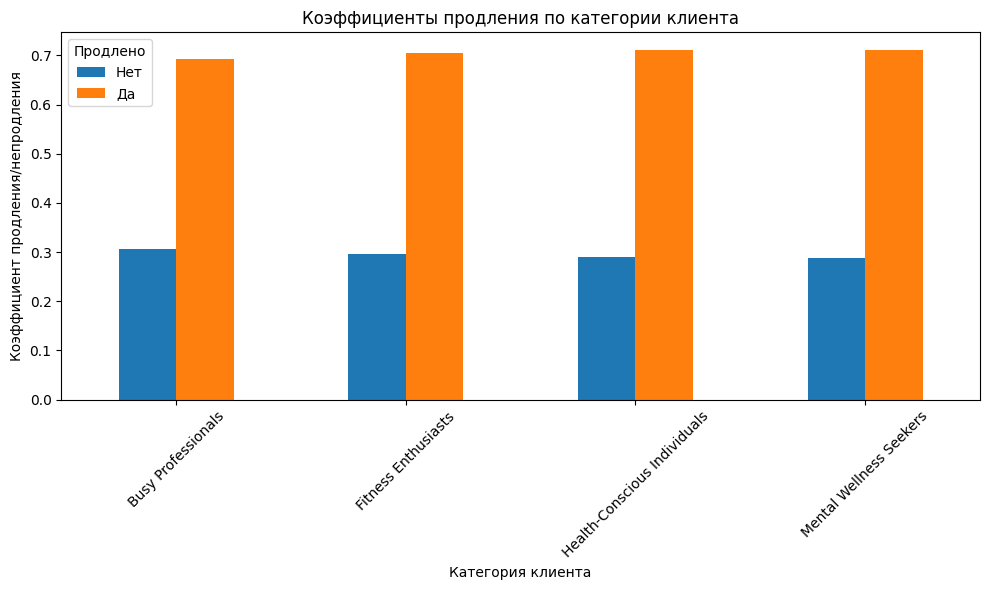

In [87]:
renewal_rates.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Коэффициенты продления по категории клиента')
plt.xlabel('Категория клиента')
plt.ylabel('Коэффициент продления/непродления')
plt.xticks(rotation=45)
plt.legend(title='Продлено', labels=['Нет', 'Да'])
plt.tight_layout()
plt.show()

Также попробуем найти временные закономерности. Посмотрим, как продолжительность текущей подписки влияет на коэффициент продления подписки.

In [88]:
df['cohort_group'] = df['start_date'].dt.to_period('M')
cohort_data = df.groupby(['cohort_group', 'client_category'])['client_id'].nunique().reset_index()
cohort_counts = cohort_data.pivot_table(index='cohort_group', columns='client_category', values='client_id', fill_value=0)
cohort_counts

client_category,Busy Professionals,Fitness Enthusiasts,Health-Conscious Individuals,Mental Wellness Seekers
cohort_group,,,,
2023-01,210.0,219.0,219.0,211.0
2023-02,197.0,177.0,193.0,192.0
2023-03,207.0,185.0,212.0,220.0
2023-04,221.0,215.0,214.0,215.0
2023-05,216.0,221.0,198.0,229.0
2023-06,180.0,243.0,211.0,207.0
2023-07,209.0,209.0,229.0,191.0
2023-08,201.0,201.0,211.0,244.0
2023-09,204.0,180.0,184.0,210.0


Посчитаем среднюю продолжительность подписки с продлением и без продления

In [89]:
df['subscription_length'] = (df['end_date'] - df['start_date']).dt.days
renewal_length = df[df['renewal_flag'] == 1]['subscription_length'].mean()
renewal_length

198.16416004540295

In [90]:
non_renewal_length = df[df['renewal_flag'] == 0]['subscription_length'].mean()
non_renewal_length

196.24627371273712

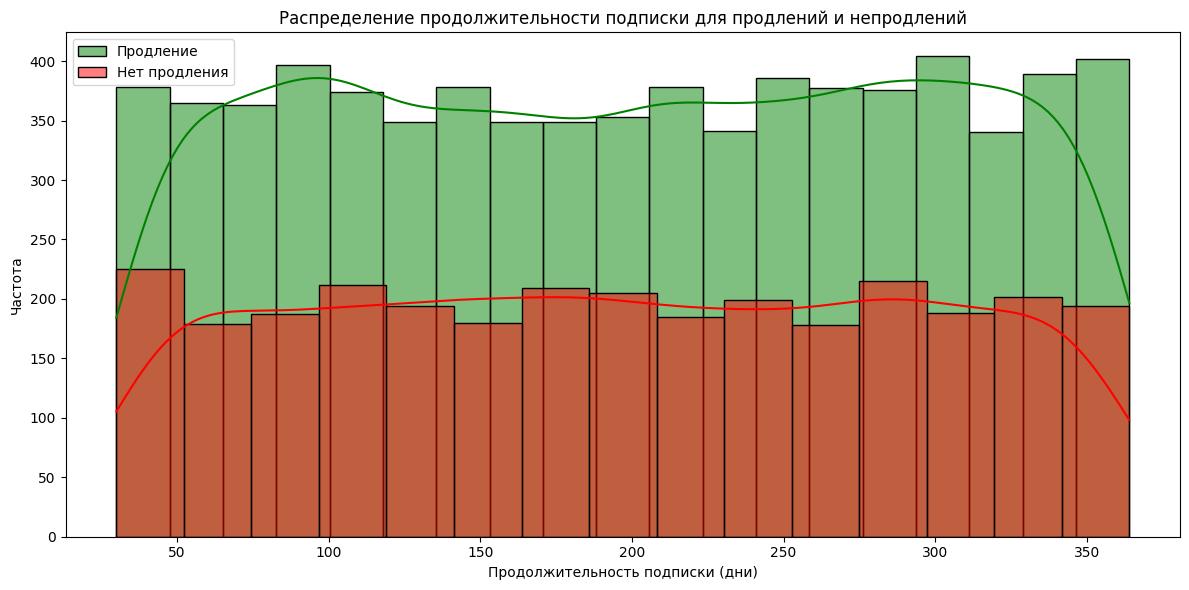

In [66]:
plt.figure(figsize=(12, 6))

sns.histplot(df[df['renewal_flag'] == 1]['subscription_length'], kde=True, color='green', label='Продление')
sns.histplot(df[df['renewal_flag'] == 0]['subscription_length'], kde=True, color='red', label='Нет продления')

plt.title('Распределение продолжительности подписки для продлений и непродлений')
plt.xlabel('Продолжительность подписки (дни)')
plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.show()


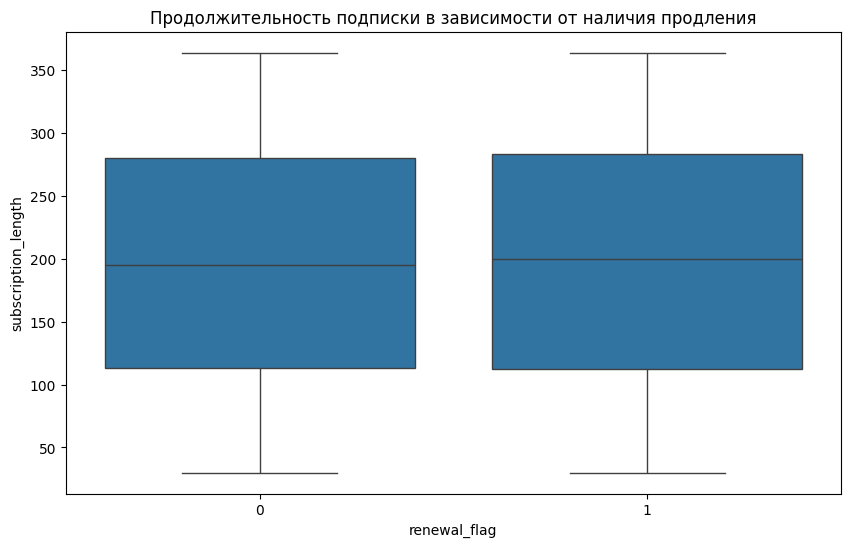

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='renewal_flag', y='subscription_length', data=df)
plt.title('Продолжительность подписки в зависимости от наличия продления')
plt.xlabel('renewal_flag')
plt.ylabel('subscription_length')

plt.show()

Построив распределение и боксплоты, мы убедились в том, что средняя продолжительность подписок как в случаях, когда клиент продлевает подписку, так и в случаях, когда клиент прекращает пользоваться сервисом, практически не отличается. Также мы наблюдаем и отсутствие выбросов в данных на текущем этапе.

#### Проверка гипотезы 
"that fitness enthusiasts who receive special session access are more likely to renew their subscriptions than other client categories"

Для проведения A/B теста создаём рандомизированную контрольную группу (ввиду малочисленности категории "Fitness Enthusiasts", мы берем тестовую группу равной размеру этой категории).

In [122]:
target_size = len(df[df['client_category'] == 'Fitness Enthusiasts'])
target = df[df['client_category'] == 'Fitness Enthusiasts']
control = []

data = df[df['client_category'] != 'Fitness Enthusiasts']
control = data.sample(n=target_size, random_state=42)
control

,client_id,start_date,end_date,client_category,renewal_flag,cohort_group,subscription_length
7824,7825,2023-10-27,2023-12-15,Mental Wellness Seekers,1,2023-10,49
1890,1891,2023-07-30,2024-04-15,Mental Wellness Seekers,0,2023-07,260
3593,3594,2023-07-10,2023-12-26,Health-Conscious Individuals,1,2023-07,169
8492,8493,2023-01-20,2023-07-21,Health-Conscious Individuals,1,2023-01,182
5065,5066,2023-11-23,2024-02-11,Busy Professionals,1,2023-11,80
...,...,...,...,...,...,...,...
3819,3820,2023-06-24,2023-12-31,Mental Wellness Seekers,1,2023-06,190
4095,4096,2023-09-28,2024-08-03,Busy Professionals,1,2023-09,310
8821,8822,2023-12-26,2024-03-23,Health-Conscious Individuals,1,2023-12,88
7117,7118,2023-05-01,2024-04-29,Mental Wellness Seekers,1,2023-05,364


In [123]:
control.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2476 entries, 7824 to 7333
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   client_id            2476 non-null   int64         
 1   start_date           2476 non-null   datetime64[ns]
 2   end_date             2476 non-null   datetime64[ns]
 3   client_category      2476 non-null   object        
 4   renewal_flag         2476 non-null   int64         
 5   cohort_group         2476 non-null   period[M]     
 6   subscription_length  2476 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(1), period[M](1)
memory usage: 154.8+ KB


Заметим, что в контрольной группе представлены представители трёх категорий также примерно равномерно.

In [124]:
print(control[['client_category','renewal_flag','client_id']].groupby(['client_category','renewal_flag']).count())
print(target[['client_category','renewal_flag','client_id']].groupby(['client_category','renewal_flag']).count())

                                           client_id
client_category              renewal_flag           
Busy Professionals           0                   246
                             1                   582
Health-Conscious Individuals 0                   219
                             1                   604
Mental Wellness Seekers      0                   247
                             1                   578
                                  client_id
client_category     renewal_flag           
Fitness Enthusiasts 0                   733
                    1                  1743


Рассчитаем конверсии для контрольной и тестовой группы

In [125]:
renewal_control = control['renewal_flag'].sum()/control['client_id'].count()
renewal_control

0.7124394184168013

In [126]:
renewal_target = target['renewal_flag'].sum()/target['client_id'].count()
renewal_target

0.7039579967689822

Получается, что конверсия в тестовой группе примерно на 1% меньше, чем в контрольной. Можно предварительно сказать, что гипотеза не оправдалась, однако надо проверить результаты на статистическую значимость.

In [129]:
conv_target = target['renewal_flag'].sum() # число продлений в тесте
seen_target = target['client_id'].count() # общее число наблюдений в тесте

conv_control = control['renewal_flag'].sum() # число продлений в контроле
seen_control = control['client_id'].count() # общее число наблюдений в контроле

print((conv_target/seen_target)/(conv_control/seen_control)-1)

-0.011904761904761862


In [130]:
from scipy.stats import binomtest

result = binomtest(conv_target, seen_target, conv_control/seen_control, alternative='two-sided')
result.pvalue

0.3511700661874084

Получается, что p-value > 0.05, это значит, что мы не можем отвергнуть нулевую гипотезу, то есть не можем утверждать, что разница в конверсиях статистически значима. Требуются дополнительные исследования на большем объёме данных.